Машины опорных векторов (сокращенно SVM) — это контролируемые алгоритмы машинного обучения, которые используются для целей классификации и регрессии. В этом задании вам необходимо обучить Support Vector Machines для классификации пульсаров. 


**1. Прочитайте данные, сделайте беглый EDA - посмотрите на кол-во данных, названия столбцов, нет ли в них ошибок, переименуйте для более удобной работы, есть ли пропущенные значения. Посмотрите нет ли дисбаланса классов по таргету? Сделайте саммари по признакам. Отобразите боксплоты признаков, чтобы оценить выбросы в данных. Постройте гистограммы признаков, чтобы взглянуть на распределение данных.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('pulsar_data_train.csv')

In [3]:
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


Переименуем длинные названия у столбцов признаков

In [4]:
df = df.rename(columns = {' Mean of the integrated profile':'M_IP',
                          ' Standard deviation of the integrated profile':'STD_IP',
                       ' Excess kurtosis of the integrated profile':'EK_IP',
                       ' Skewness of the integrated profile':'S_IP',
                       ' Mean of the DM-SNR curve':'M_DM-SNR',
                       ' Standard deviation of the DM-SNR curve':'STD_DM-SNR',
                       ' Excess kurtosis of the DM-SNR curve':'EK_DM-SNR',
                       ' Skewness of the DM-SNR curve':'S_DM-SNR'})

In [5]:
print (df.columns)

Index(['M_IP', 'STD_IP', 'EK_IP', 'S_IP', 'M_DM-SNR', 'STD_DM-SNR',
       'EK_DM-SNR', 'S_DM-SNR', 'target_class'],
      dtype='object')


In [6]:
df.info()# все признаки - числовые

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   M_IP          12528 non-null  float64
 1   STD_IP        12528 non-null  float64
 2   EK_IP         10793 non-null  float64
 3   S_IP          12528 non-null  float64
 4   M_DM-SNR      12528 non-null  float64
 5   STD_DM-SNR    11350 non-null  float64
 6   EK_DM-SNR     12528 non-null  float64
 7   S_DM-SNR      11903 non-null  float64
 8   target_class  12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [7]:
df.isnull().sum()

M_IP               0
STD_IP             0
EK_IP           1735
S_IP               0
M_DM-SNR           0
STD_DM-SNR      1178
EK_DM-SNR          0
S_DM-SNR         625
target_class       0
dtype: int64

у 3 признаков (EK_IP, STD_DM-SNR, S_DM-SNR) есть NULL значения 

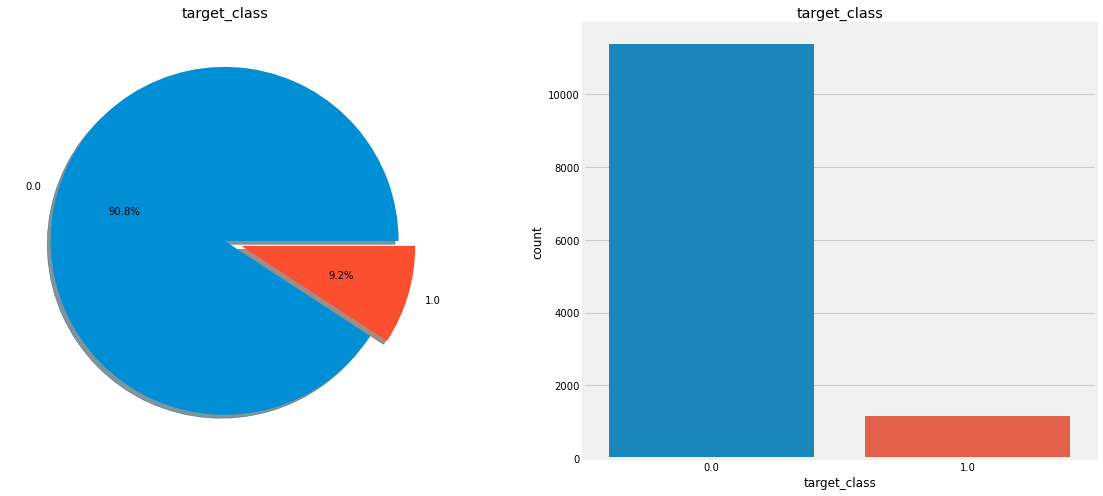

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['target_class'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target_class')
ax[0].set_ylabel('')
sns.countplot('target_class',data=df,ax=ax[1])
ax[1].set_title('target_class')
plt.show()

Есть сильный дисбаланс классов по target

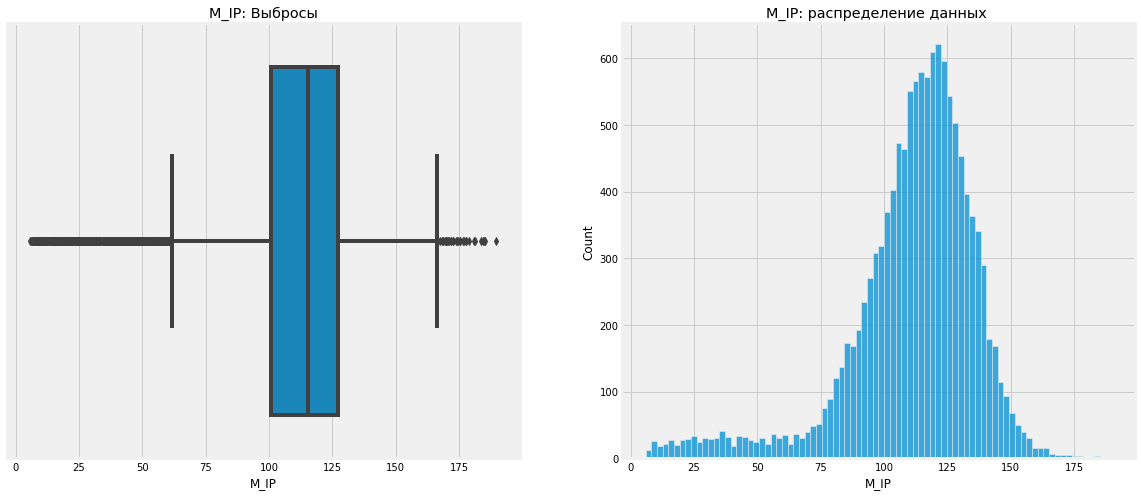

In [20]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.boxplot(x=df['M_IP'], ax=ax[0])
sns.histplot(x=df['M_IP'], ax=ax[1])
ax[0].set_title('M_IP: Выбросы')
ax[1].set_title('M_IP: распределение данных ')
plt.show()

Вывод: У M_IP есть выбросы, распределение асимметрично (левостороннее), хвост в левой части.

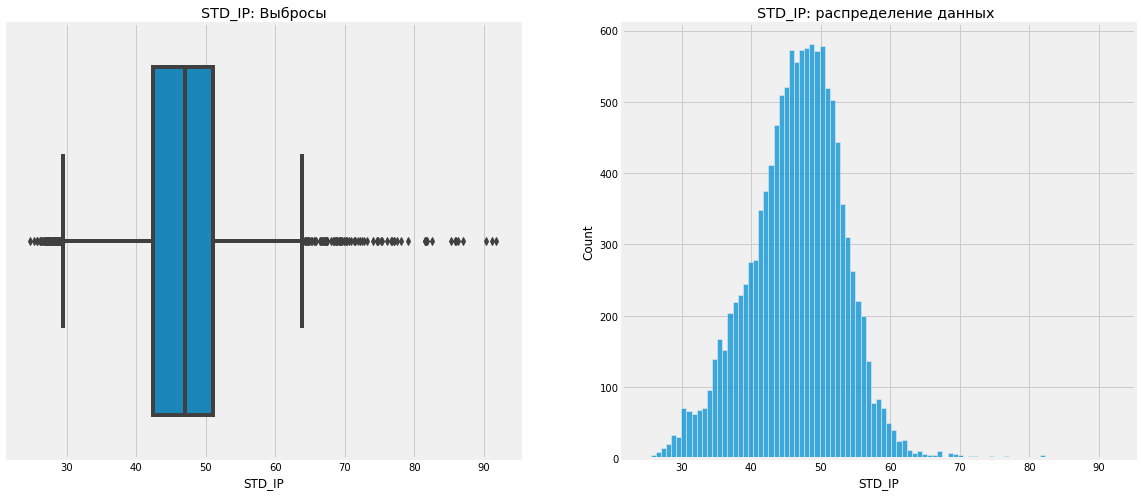

In [21]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.boxplot(x=df['STD_IP'], ax=ax[0])
sns.histplot(x=df['STD_IP'], ax=ax[1])
ax[0].set_title('STD_IP: Выбросы')
ax[1].set_title('STD_IP: распределение данных ')
plt.show()

Вывод: У STD_IP есть выбросы, распределение близко к нормальному, небольшой хвост в правой части

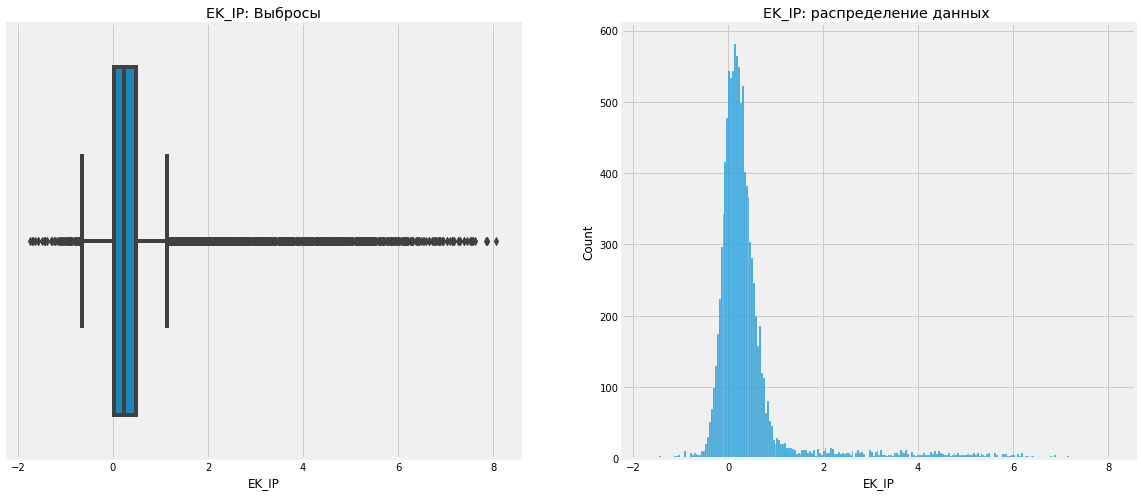

In [22]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.boxplot(x=df['EK_IP'], ax=ax[0])
sns.histplot(x=df['EK_IP'], ax=ax[1])
ax[0].set_title('EK_IP: Выбросы')
ax[1].set_title('EK_IP: распределение данных ')
plt.show()

Вывод: У EK_IP правосторонее распределение, много выбросов 

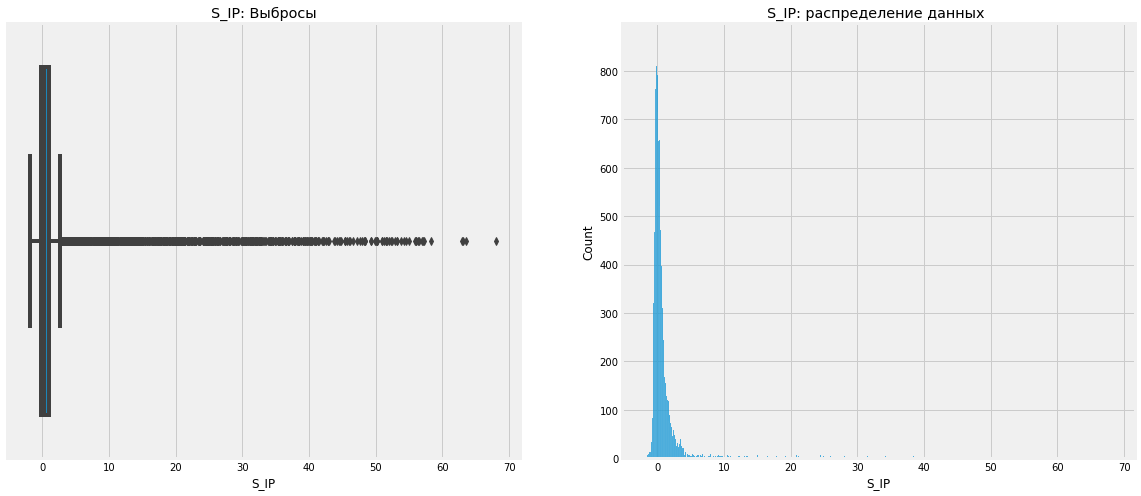

In [23]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.boxplot(x=df['S_IP'], ax=ax[0])
sns.histplot(x=df['S_IP'], ax=ax[1])
ax[0].set_title('S_IP: Выбросы')
ax[1].set_title('S_IP: распределение данных ')
plt.show()

Вывод: У S_IP много выбросов-хвост в правой части , распределение скошено вправо

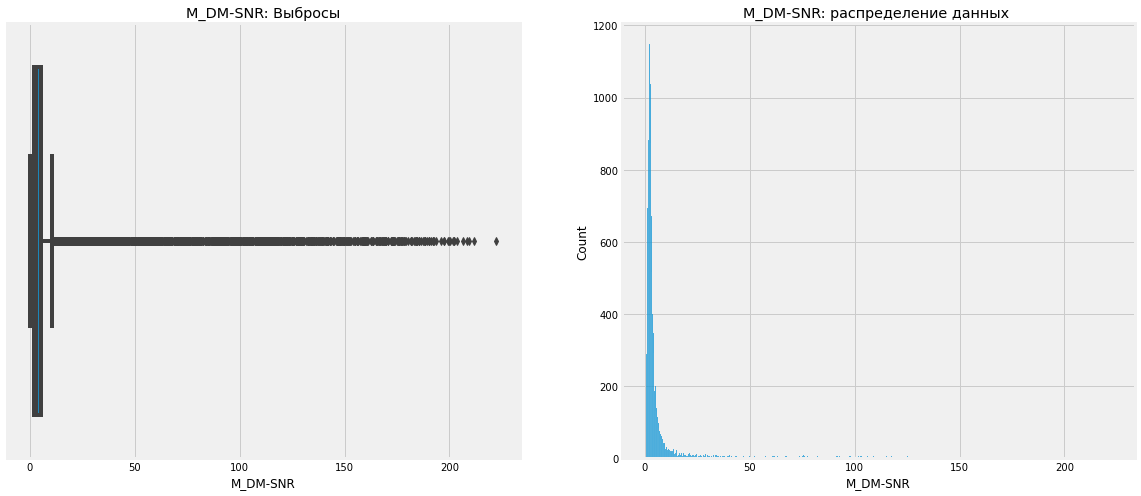

In [24]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.boxplot(x=df['M_DM-SNR'], ax=ax[0])
sns.histplot(x=df['M_DM-SNR'], ax=ax[1])
ax[0].set_title('M_DM-SNR: Выбросы')
ax[1].set_title('M_DM-SNR: распределение данных ')
plt.show()

Вывод: У M_DM-SNR много выбросов-хвост в правой части, распределение скошено вправо

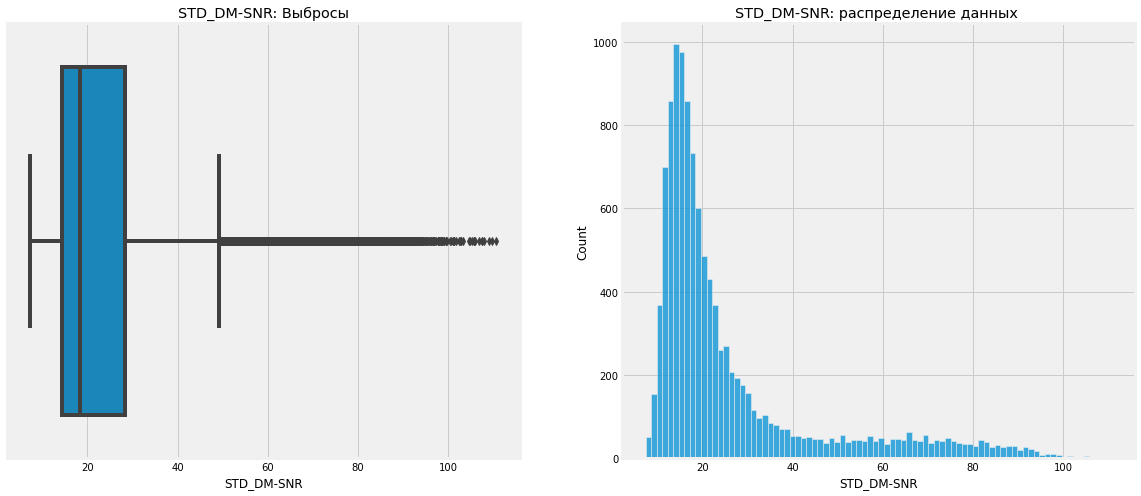

In [25]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.boxplot(x=df['STD_DM-SNR'], ax=ax[0])
sns.histplot(x=df['STD_DM-SNR'], ax=ax[1])
ax[0].set_title('STD_DM-SNR: Выбросы')
ax[1].set_title('STD_DM-SNR: распределение данных ')
plt.show()

Вывод: У STD_DM-SNR много выбросов-хвост в правой части, распределение скошено вправо

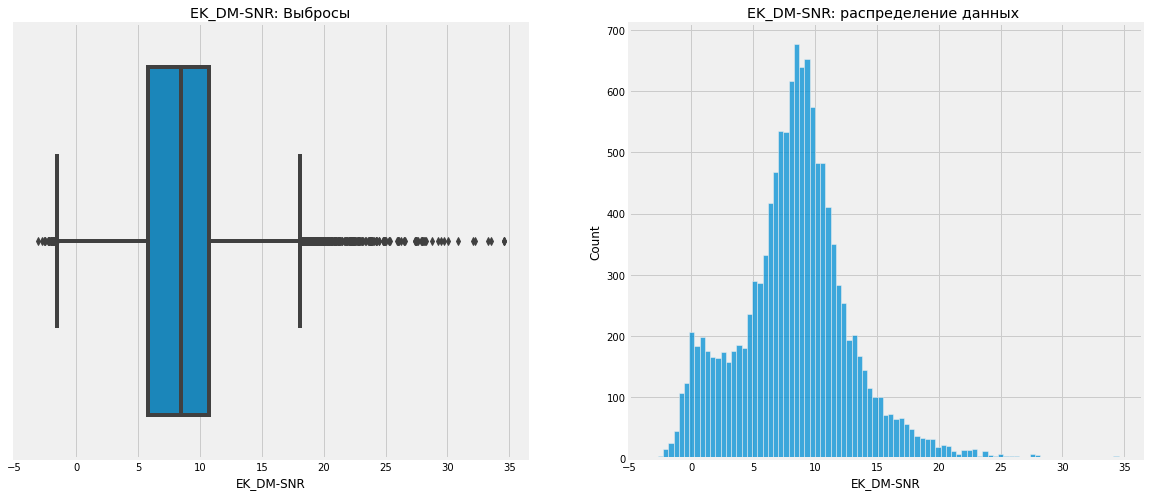

In [26]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.boxplot(x=df['EK_DM-SNR'], ax=ax[0])
sns.histplot(x=df['EK_DM-SNR'], ax=ax[1])
ax[0].set_title('EK_DM-SNR: Выбросы')
ax[1].set_title('EK_DM-SNR: распределение данных ')
plt.show()

Вывод: Левосторонее распределение, выбросы.

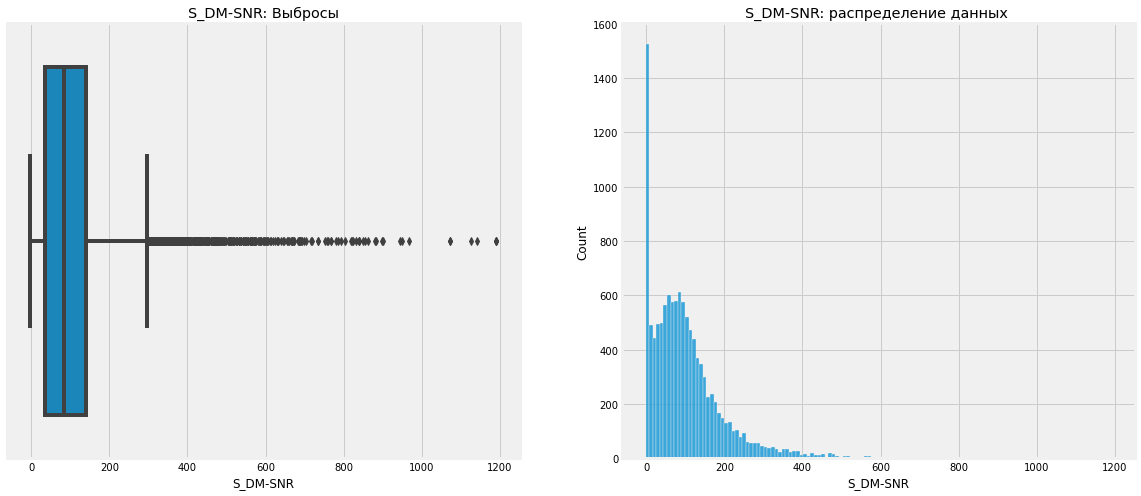

In [27]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.boxplot(x=df['S_DM-SNR'], ax=ax[0])
sns.histplot(x=df['S_DM-SNR'], ax=ax[1])
ax[0].set_title('S_DM-SNR: Выбросы')
ax[1].set_title('S_DM-SNR: распределение данных ')
plt.show()

Вывод: Скошено вправо, выбросы - хвост в правой части.

Общий вывод по переменным: У всех переменных наблюдается много выбросов, а также перекосы в распределении данных.

Посмотрим на корреляцию между признаками и классами 1,0:

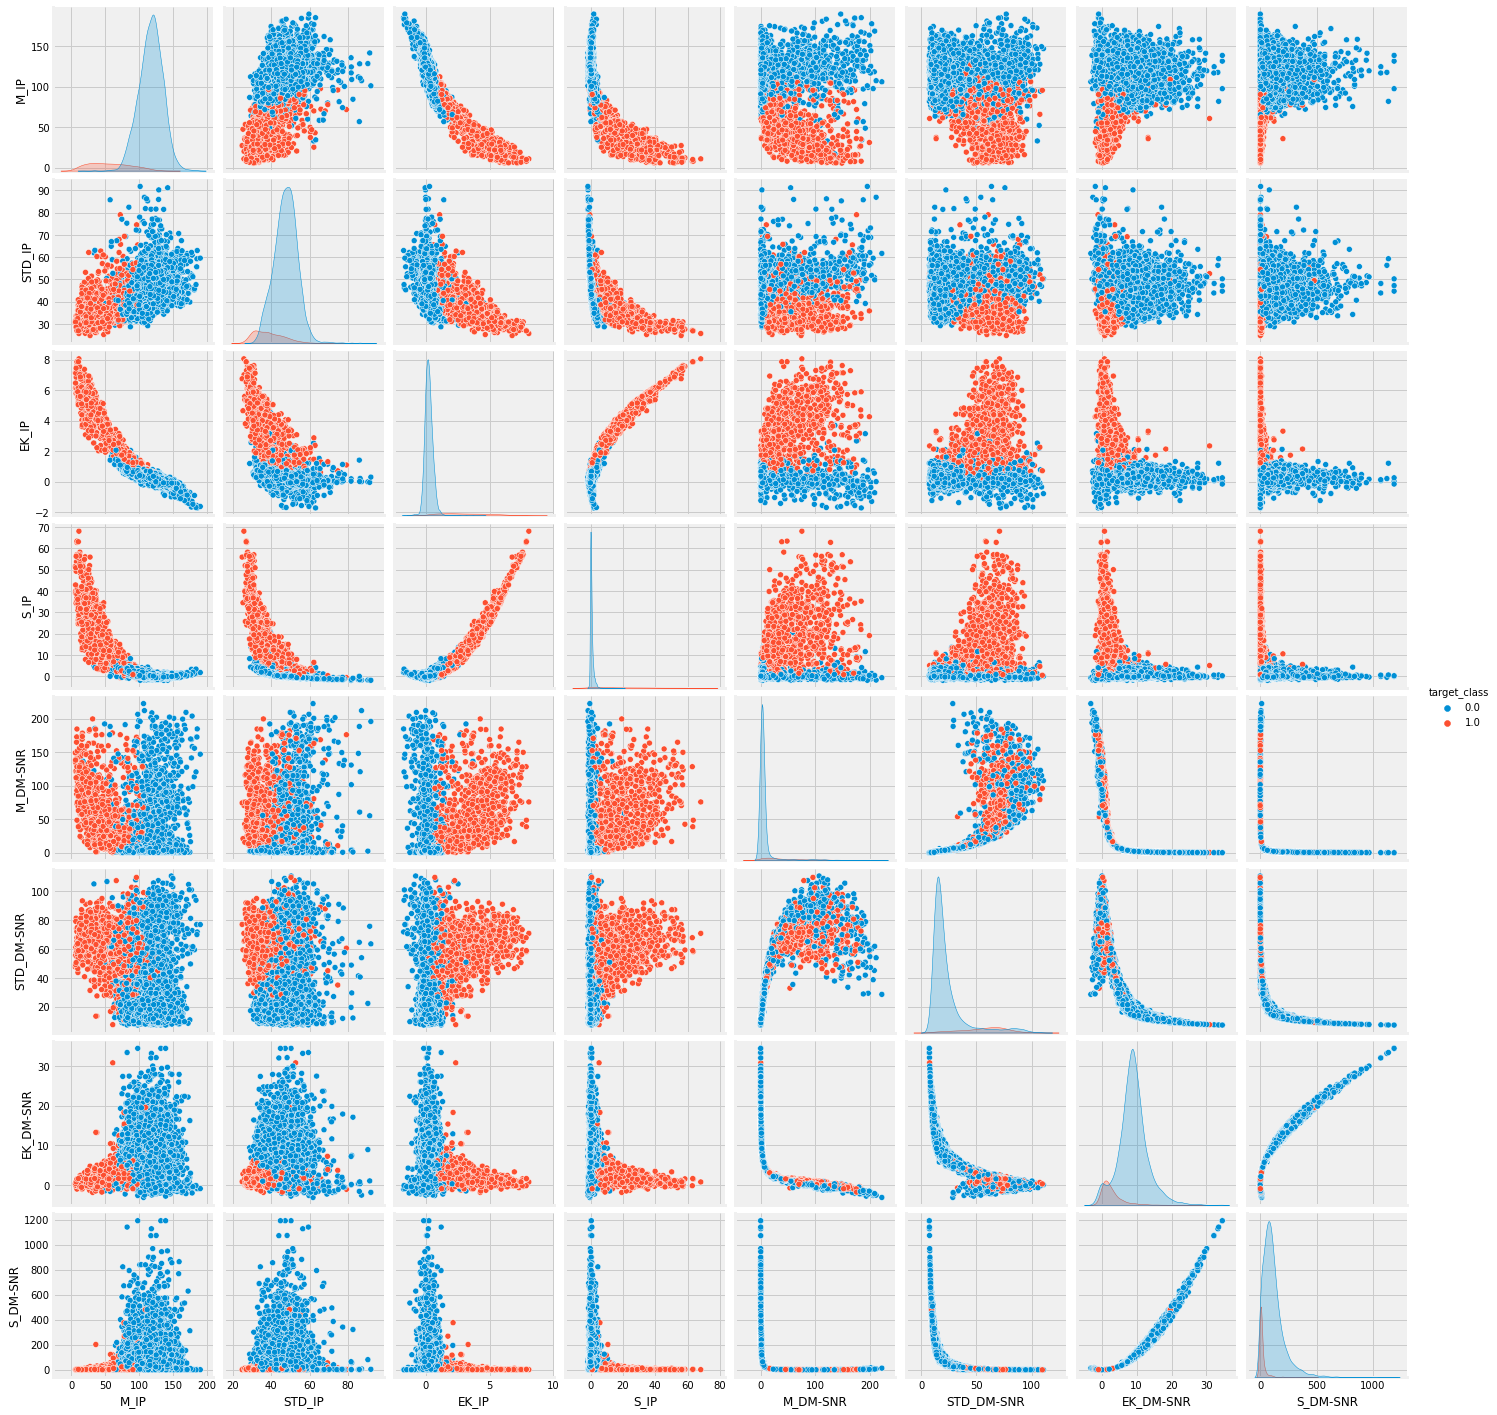

In [34]:
sns.pairplot(df, hue="target_class")

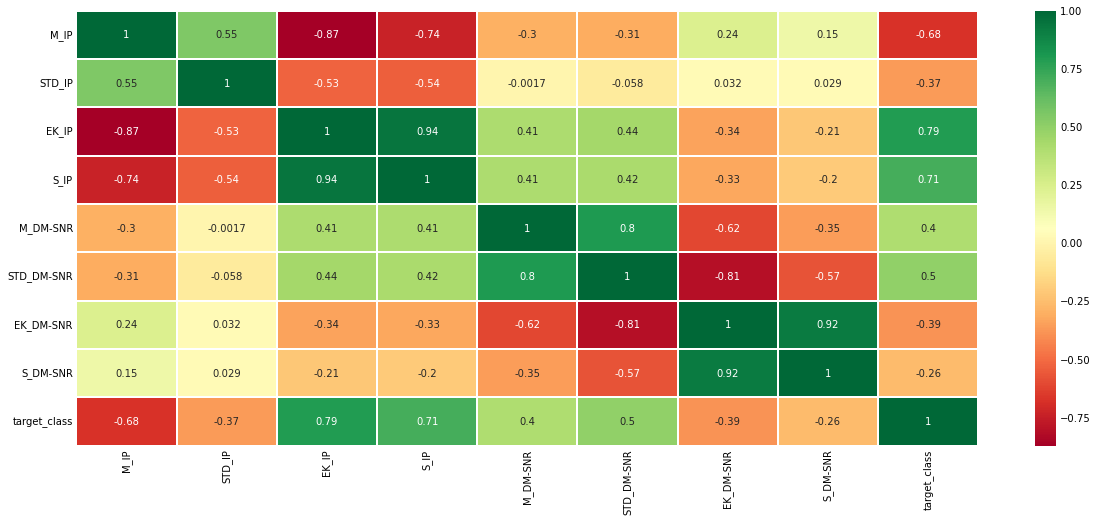

In [8]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(18,8)
plt.show()

Видим довольно сильные корреляции между признаками:  
    "-" S_IP и M_IP, EK_IP и M_IP, EK_DM-SNR и STD_DM-SNR  
    "+" S_IP и EK_IP, M_DM-SNR и STD_DM-SNR, S_DM-SNR и EK_DM-SNR

**2. Определите матрицу признаков и переменную таргета. Разделите трейновый набор трейн и тест с помощью train_test_split. Зафиксируйте размер тестовой выборки 0.2, а рэндом стэйт равный 0.** 

In [6]:
X = df.drop(['target_class'],axis=1)
y = df['target_class']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 0)

In [7]:
for df1 in [X_train, X_test]:#замена NULL медианой
    for col in X_train.columns:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)  

In [8]:
X_train.isnull().sum()

M_IP          0
STD_IP        0
EK_IP         0
S_IP          0
M_DM-SNR      0
STD_DM-SNR    0
EK_DM-SNR     0
S_DM-SNR      0
dtype: int64

In [9]:
X_test.isnull().sum()

M_IP          0
STD_IP        0
EK_IP         0
S_IP          0
M_DM-SNR      0
STD_DM-SNR    0
EK_DM-SNR     0
S_DM-SNR      0
dtype: int64

**3. Используя StandartScaler отмасштабируйте матрицу признаков трейн и тест.**

In [10]:
cols = X_train.columns 

from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

**4. Обучите SVM Classifier на данных используя GridSearchCV: Попробуйте разные значения С, типа ядер, а так же значение гамма для rbf ядра. Подберите правильную метрику для оценки качества алгоритма. Убедитесь, что значения на тестровой и трейновой выборке сопоставимы и модель не переобучилась.**

In [76]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC(random_state=0,class_weight='balanced')
    
param_grid=[{'C': [10, 100, 200],'kernel': ['linear']},
            {'C': [10, 100, 200],'kernel': ['rbf'],'gamma': [0.001, 0.01, 0.1]} ]
           
gridsearch=GridSearchCV(estimator = svc,
                        param_grid = param_grid,
                        scoring='roc_auc', 
                        verbose = 3)
gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...............C=10, kernel=linear;, score=0.977 total time=   1.6s
[CV 2/5] END ...............C=10, kernel=linear;, score=0.976 total time=   1.5s
[CV 3/5] END ...............C=10, kernel=linear;, score=0.961 total time=   1.3s
[CV 4/5] END ...............C=10, kernel=linear;, score=0.971 total time=   1.4s
[CV 5/5] END ...............C=10, kernel=linear;, score=0.965 total time=   1.4s
[CV 1/5] END ..............C=100, kernel=linear;, score=0.977 total time=   6.6s
[CV 2/5] END ..............C=100, kernel=linear;, score=0.976 total time=   7.2s
[CV 3/5] END ..............C=100, kernel=linear;, score=0.961 total time=   6.9s
[CV 4/5] END ..............C=100, kernel=linear;, score=0.971 total time=   7.5s
[CV 5/5] END ..............C=100, kernel=linear;, score=0.965 total time=   7.1s
[CV 1/5] END ..............C=200, kernel=linear;, score=0.977 total time=  14.9s
[CV 2/5] END ..............C=200, kernel=linear;

GridSearchCV(estimator=SVC(class_weight='balanced', random_state=0),
             param_grid=[{'C': [10, 100, 200], 'kernel': ['linear']},
                         {'C': [10, 100, 200], 'gamma': [0.001, 0.01, 0.1],
                          'kernel': ['rbf']}],
             scoring='roc_auc', verbose=3)

In [77]:
gridsearch.best_score_

0.9756293371272612

In [78]:
gridsearch.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

Перебрали несколько значений C и gamma, подобрали интерваля так, что лучшие значения этих параметров находятся в середине списков, В качестве метрики оценки качества модели выбрана: MAE, значение neg_mean_absolute_error не меняется. Определили лучшие параметры будем далее использовать их.

In [79]:
from sklearn.svm import SVC #обучение модели на лучших показателях
svc = SVC(kernel='rbf', C= 100, gamma=0.01, class_weight='balanced')
svc.fit(X_train, y_train)

SVC(C=100, class_weight='balanced', gamma=0.01)

In [80]:
y_test_pred = svc.predict(X_test)

In [81]:
y_train_pred = svc.predict(X_train)

Значения ROC-AUC на трейн и тест выборках сопоставимы=>модель не переобучилась.

In [82]:
from sklearn.metrics import roc_auc_score 
roc_auc_score(y_train_pred, y_train), roc_auc_score(y_test_pred, y_test)

(0.9045001536799845, 0.9091531580083904)

**5. Постройте confusion_matrix и classification report.**

(array([0.5, 1.5]), [Text(0, 0.5, '0'), Text(0, 1.5, '1')])

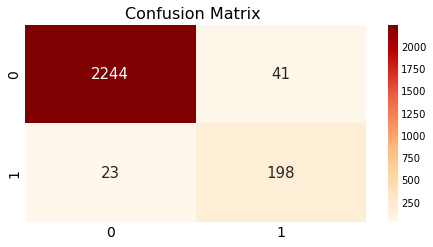

In [83]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, cmap='OrRd', fmt='d',annot_kws={'size':15})
plt.title('Confusion Matrix ', fontsize=16)
plt.xticks(fontsize=14)    
plt.yticks(fontsize=14)

In [84]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2285
         1.0       0.83      0.90      0.86       221

    accuracy                           0.97      2506
   macro avg       0.91      0.94      0.92      2506
weighted avg       0.98      0.97      0.97      2506



**6. Обучите Decision tree classifier на тех же данных, используя GridSearchCV подберите гиперпараметры для модели. Используйте ту же метрику, что и в задаче с SVM. Убедитесь, что алгоритм не переобучился**

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(random_state=0,class_weight='balanced')
    
param_grid=[{'criterion': ['gini', 'entropy'], 'max_depth': [2, 5, 8]} ]
           
gridsearch=GridSearchCV(estimator = tree,
                        param_grid = param_grid,
                        scoring='roc_auc', 
                        verbose = 3)
gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .......criterion=gini, max_depth=2;, score=0.949 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=2;, score=0.937 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=2;, score=0.901 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=2;, score=0.935 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=2;, score=0.923 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=5;, score=0.951 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=5;, score=0.951 total time=   0.0s
[CV 3/5] END .......criterion=gini, max_depth=5;, score=0.952 total time=   0.0s
[CV 4/5] END .......criterion=gini, max_depth=5;, score=0.932 total time=   0.0s
[CV 5/5] END .......criterion=gini, max_depth=5;, score=0.940 total time=   0.0s
[CV 1/5] END .......criterion=gini, max_depth=8;, score=0.927 total time=   0.0s
[CV 2/5] END .......criterion=gini, max_depth=8;,

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=0),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 5, 8]}],
             scoring='roc_auc', verbose=3)

In [93]:
gridsearch.best_score_

0.9599712153378526

In [94]:
gridsearch.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [96]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0,class_weight='balanced')
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, random_state=0)

In [97]:
y_test_pred = tree.predict(X_test)

In [98]:
y_train_pred = tree.predict(X_train)

In [99]:
from sklearn.metrics import roc_auc_score 
roc_auc_score(y_train_pred, y_train), roc_auc_score(y_test_pred, y_test)

(0.8070602244424478, 0.7841657161479552)

**7. Постройте confusion_matrix и classification report.**

(array([0.5, 1.5]), [Text(0, 0.5, '0'), Text(0, 1.5, '1')])

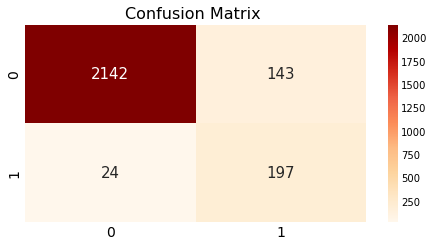

In [100]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, cmap='OrRd', fmt='d',annot_kws={'size':15})
plt.title('Confusion Matrix ', fontsize=16)
plt.xticks(fontsize=14)    
plt.yticks(fontsize=14)

In [101]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96      2285
         1.0       0.58      0.89      0.70       221

    accuracy                           0.93      2506
   macro avg       0.78      0.91      0.83      2506
weighted avg       0.95      0.93      0.94      2506



**8. Напишите выводы по качеству моделей.**

Полученная SVC модель намного точнее предсказывает целевую переменную, качество получившейся DecisionTreeClassifier модели ниже 